!pip install torch

In [1]:
!pip install wordcloud
!pip install transformers
!pip install selenium

Load Necessary Libraries

In [2]:
from selenium.webdriver.common.by import By
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import re
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from transformers import pipeline
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = stopwords.words('english')

#load spacy english model
nlp = spacy.load("en_core_web_sm")

#get stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#add stopwords
stop_words.update(['I','like','look','see','one'])


c:\Users\mikek\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mikek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read the data in

In [3]:
ufo_data = pd.read_csv("nuforc_data_2023_2025.csv")
print(ufo_data.head())  

   Link Month-Year         Occurred             City           State  \
0  Open    2025/01  1/30/2025 20:10          Holyoke              MA   
1  Open    2025/01  1/30/2025 19:42           Duluth              MN   
2  Open    2025/01  1/30/2025 18:35          Smrjene       Ljubljana   
3  Open    2025/01  1/30/2025 18:00           Maldon         England   
4  Open    2025/01   1/30/2025 7:48  Sfântu Gheorghe  Covasna County   

          Country     Shape  \
0             USA       Orb   
1             USA     Light   
2        Slovenia    Circle   
3  United Kingdom       Orb   
4         Romania  Changing   

                                             Summary Media  Explanation  
0  Strange shape shifting orb that hovered and fl...   NaN          NaN  
1  Witnessed odd light near TV antenna, pursued, ...     Y  Planet/Star  
2                        Moving fast & not straight.     Y     Aircraft  
3  Small white / Blue orb moving sporadically thr...     Y       Drone?  
4  Above m

In [4]:
ufo_drone_data = pd.read_csv("drone_reports.csv")
print(ufo_drone_data.head())  


   Link         Occurred            City    State         Country    Shape  \
0  Open  1/30/2025 18:00          Maldon  England  United Kingdom      Orb   
1  Open  1/28/2025 20:33          Sabina       OH             USA  Unknown   
2  Open  1/28/2025 19:32          Formby  England  United Kingdom      Orb   
3  Open  1/28/2025 10:40     Springfield       OH             USA    Cross   
4  Open  1/27/2025 17:55  New York Mills       NY             USA    Light   

                                             Summary Media Explanation  
0  Small white / Blue orb moving sporadically thr...     Y      Drone?  
1  A green-lit object appeared above me, phased i...   NaN      Drone?  
2  Pulsating green light moved swiftly in straigh...     Y      Drone?  
3  At 10:40 AM EST, I saw a metallic, X-shaped ob...     Y      Drone?  
4  it was 3 round red lights next to 3 round gree...     Y      Drone?  


Clean the Data for both sets

for raw ufo data

In [5]:
#replace missing values in media column

ufo_data["Media"].value_counts()

#replace missing in explanation

ufo_data["Explanation"].value_counts()





Explanation
Rocket                89
Drone?                53
Starlink              47
Planet/Star           39
Aircraft?             36
Balloon?              35
Aircraft              27
Balloon               24
Planet/Star?          21
Camera Anomaly        18
Rocket?               17
Starlink?             16
Chinese Lantern?      14
Bird?                 14
Meteor?               12
Searchlight           11
Chinese Lantern       11
Meteor                10
Satellite              8
Contrail?              8
Satellite?             8
Insect?                8
Drone                  7
Birds?                 7
Bird                   6
Contrail               6
Insect                 5
Unexplained            4
Cloud                  4
Searchlight?           4
Cloud?                 4
Flares?                4
Camera Anomaly?        3
Laser                  2
Balloons               2
Reflection             2
Blimp                  2
Kite                   1
Helicopter?            1
Hoax?        

For drone data

In [6]:
#replace missing values in media column

ufo_drone_data["Media"].value_counts()

#replace missing in explanation

ufo_drone_data["Explanation"].value_counts()




Explanation
Drone?    344
Name: count, dtype: int64

In [7]:
ufo_data.columns

Index(['Link', 'Month-Year', 'Occurred', 'City', 'State', 'Country', 'Shape',
       'Summary', 'Media', 'Explanation'],
      dtype='object')

In [8]:
ufo_data['Explanation'].value_counts()

Explanation
Rocket                89
Drone?                53
Starlink              47
Planet/Star           39
Aircraft?             36
Balloon?              35
Aircraft              27
Balloon               24
Planet/Star?          21
Camera Anomaly        18
Rocket?               17
Starlink?             16
Chinese Lantern?      14
Bird?                 14
Meteor?               12
Searchlight           11
Chinese Lantern       11
Meteor                10
Satellite              8
Contrail?              8
Satellite?             8
Insect?                8
Drone                  7
Birds?                 7
Bird                   6
Contrail               6
Insect                 5
Unexplained            4
Cloud                  4
Searchlight?           4
Cloud?                 4
Flares?                4
Camera Anomaly?        3
Laser                  2
Balloons               2
Reflection             2
Blimp                  2
Kite                   1
Helicopter?            1
Hoax?        

Make our y variable from the explanation column 

In [9]:
# ✅ Step 1: Convert Explanation to Lowercase and Remove Extra Spaces
ufo_data["Explanation"] = ufo_data["Explanation"].astype(str).str.strip().str.lower()



# ✅ Step 2: Reapply Classification with Normalized Values
def classify_report(explanation):
    if isinstance(explanation, str):
        explanation = explanation.strip().lower()  # Normalize input text
        
        # Drone-related classifications
        if explanation in ["drone", "drone?", "aircraft?", "aircraft", "helicopter?"]:
            return "Drone"
        
        # Clearly non-UFO explanations (hoaxes, natural objects, etc.)
        non_ufo = {
             "planet/star", "meteor", "cloud?", "dream?", "chinese lanterns", "blimp", "rocket",
             "chinese lantern", "meteor?", "planet/star?", "birds?", "starlink",  "bird?", 
            "contrail", "hoax", "satellite", "cloud", "birds", "balloon", "camera anomaly", "laser", 
            "balloons", "insect?", "comet", "satellites?", "satellite?", "chinese lanterns?", "contrail?", "searchlight", 
            "reflection", "bird", "insect", "balloons?", "smoke ring", "insects?", "flares?", "lightning?", 
            "kite", "camera anomaly?", "hoax?", "starlink-racetrack"
        }
        if explanation in non_ufo:
            return "Not an Aircraft"
    print(ufo_data['Explanation'])
    # Everything else is considered UFO
    return "UFO"

# ✅ Step 3: Apply Classification Again After Cleaning
ufo_data["Explanation"] = ufo_data["Explanation"].replace(["NA", "NaN", "null", "na"], np.nan)
ufo_data.dropna(subset=["Explanation"], inplace=True)

ufo_data["report_type"] = ufo_data["Explanation"].apply(classify_report)

# ✅ Step 4: Merge Datasets Correctly
ufo_drone_data["report_type"] = "Drone"  # Ensure drone reports are labeled
combined_df = pd.concat([ufo_data, ufo_drone_data], ignore_index=True)
combined_df.dropna(subset=["Explanation"], inplace=True)

# ✅ Step 5: Display Class Distribution to Verify Fix
print(combined_df["report_type"].value_counts())



# ✅ Show First Few Rows for Verification
display(combined_df.head(50))


print(combined_df['Explanation'].unique)




0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan

,Link,Month-Year,Occurred,City,State,Country,Shape,Summary,Media,Explanation,report_type
0,Open,2025/01,1/30/2025 20:10,Holyoke,MA,USA,Orb,Strange shape shifting orb that hovered and fl...,NaN,nan,UFO
1,Open,2025/01,1/30/2025 19:42,Duluth,MN,USA,Light,"Witnessed odd light near TV antenna, pursued, ...",Y,planet/star,Not an Aircraft
2,Open,2025/01,1/30/2025 18:35,Smrjene,Ljubljana,Slovenia,Circle,Moving fast & not straight.,Y,aircraft,Drone
3,Open,2025/01,1/30/2025 18:00,Maldon,England,United Kingdom,Orb,Small white / Blue orb moving sporadically thr...,Y,drone?,Drone
4,Open,2025/01,1/30/2025 7:48,Sfântu Gheorghe,Covasna County,Romania,Changing,Above my city a strange hovering shapeshifting...,Y,nan,UFO
5,Open,2025/01,1/29/2025 21:36,Wath upon Dearne,England,United Kingdom,Orb,I have been seeing them before but now I decid...,Y,aircraft?,Drone
6,Open,2025/01,1/29/2025 21:30,NaN,Trøndelag,Norway,Star,Looked like a star/orb with very bright light....,NaN,nan,UFO
7,Open,2025/01,1/29/2025 21:30,Philipsburg,MT,USA,Circle,"We saw two lights moving slowly, fading in and...",Y,nan,UFO
8,Open,2025/01,1/29/2025 21:18,El Pozo de Cota,Baja California Sur,Mexico,Light,Bright object was stationary and had a reddish...,Y,nan,UFO
9,Open,2025/01,1/29/2025 21:10,Dunn,NC,USA,Orb,One reddish Light was first thought to be a pl...,Y,chinese lantern?,UFO


<bound method Series.unique of 0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2866         Drone?
2867         Drone?
2868         Drone?
2869         Drone?
2870         Drone?
Name: Explanation, Length: 2868, dtype: object>


In [10]:
# Apply classification to dataset
combined_df["report_type"] = combined_df["Explanation"].apply(classify_report)

# Display class distribution
print(combined_df["report_type"].value_counts())

# Show first few rows
display(combined_df.head(50))

0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan
2523            nan
Name: Explanation, Length: 2524, dtype: object
0               nan
1       planet/star
2          aircraft
3            drone?
4               nan
           ...     
2519            nan
2520            nan
2521            nan
2522            nan

,Link,Month-Year,Occurred,City,State,Country,Shape,Summary,Media,Explanation,report_type
0,Open,2025/01,1/30/2025 20:10,Holyoke,MA,USA,Orb,Strange shape shifting orb that hovered and fl...,NaN,nan,UFO
1,Open,2025/01,1/30/2025 19:42,Duluth,MN,USA,Light,"Witnessed odd light near TV antenna, pursued, ...",Y,planet/star,Not an Aircraft
2,Open,2025/01,1/30/2025 18:35,Smrjene,Ljubljana,Slovenia,Circle,Moving fast & not straight.,Y,aircraft,Drone
3,Open,2025/01,1/30/2025 18:00,Maldon,England,United Kingdom,Orb,Small white / Blue orb moving sporadically thr...,Y,drone?,Drone
4,Open,2025/01,1/30/2025 7:48,Sfântu Gheorghe,Covasna County,Romania,Changing,Above my city a strange hovering shapeshifting...,Y,nan,UFO
5,Open,2025/01,1/29/2025 21:36,Wath upon Dearne,England,United Kingdom,Orb,I have been seeing them before but now I decid...,Y,aircraft?,Drone
6,Open,2025/01,1/29/2025 21:30,NaN,Trøndelag,Norway,Star,Looked like a star/orb with very bright light....,NaN,nan,UFO
7,Open,2025/01,1/29/2025 21:30,Philipsburg,MT,USA,Circle,"We saw two lights moving slowly, fading in and...",Y,nan,UFO
8,Open,2025/01,1/29/2025 21:18,El Pozo de Cota,Baja California Sur,Mexico,Light,Bright object was stationary and had a reddish...,Y,nan,UFO
9,Open,2025/01,1/29/2025 21:10,Dunn,NC,USA,Orb,One reddish Light was first thought to be a pl...,Y,chinese lantern?,UFO


Find most Common UFO Shape Reported

In [11]:
#get most common shape and the shape counts 
most_common_shape = combined_df["Shape"].value_counts().idxmax()
shape_counts = combined_df["Shape"].value_counts()

#display 
shape_counts


Shape
Light        407
Orb          393
Circle       330
Triangle     224
Unknown      191
Other        178
Changing     171
Sphere       130
Disk         112
Oval          92
Cigar         87
Formation     80
Cylinder      75
Rectangle     67
Fireball      62
Star          47
Diamond       39
Chevron       30
Flash         27
Cube          27
Cross         26
Egg           19
Teardrop      13
Cone          12
Name: count, dtype: int64

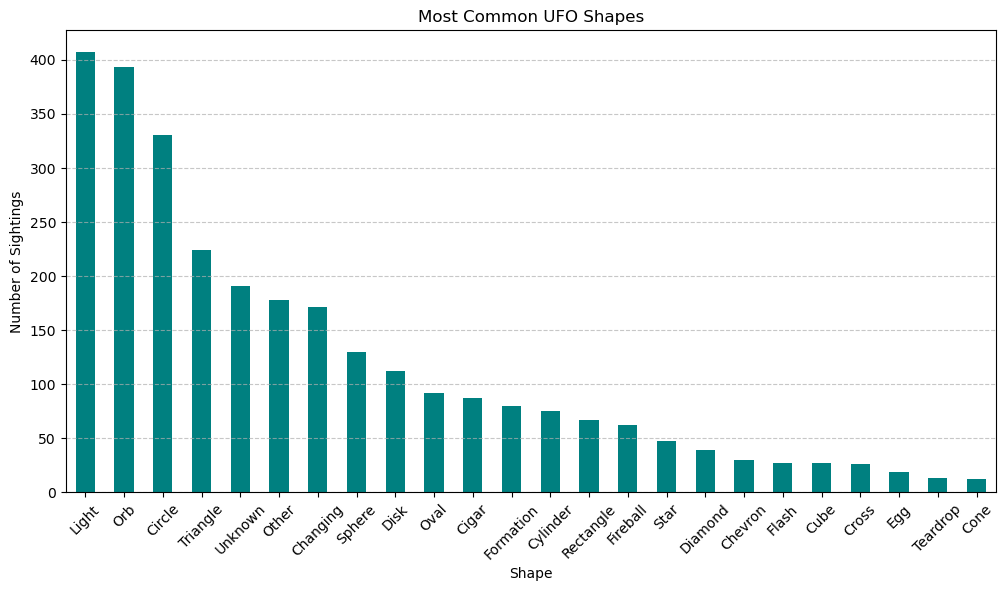

In [12]:
plt.figure(figsize=(12, 6))
shape_counts.plot(kind="bar", color="teal")
plt.title("Most Common UFO Shapes")
plt.xlabel("Shape")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Most Visited Country 

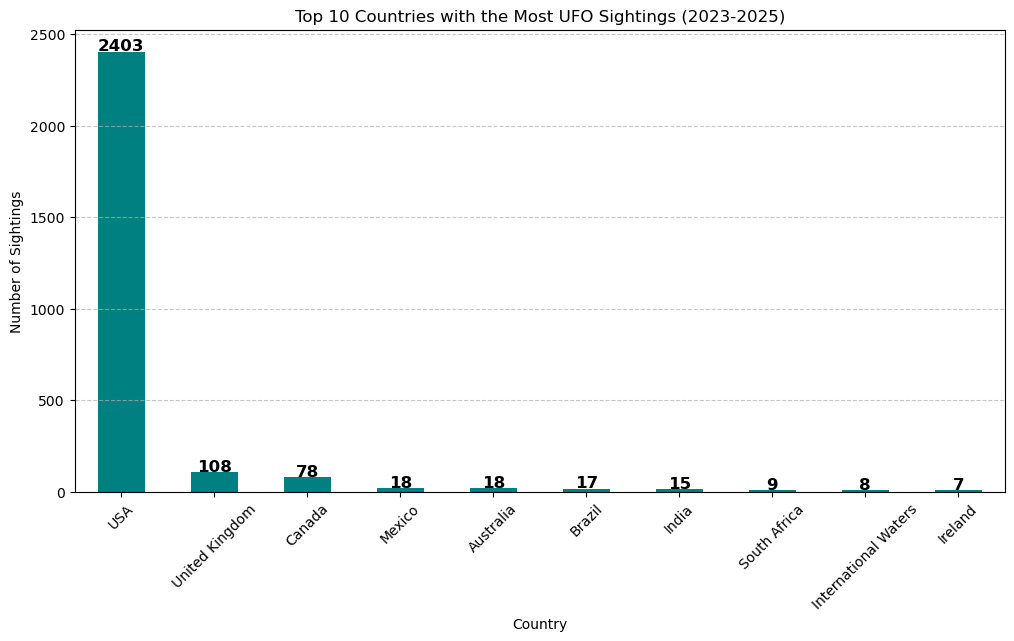

In [13]:
country_counts = combined_df["Country"].value_counts()
country_counts_max = country_counts.head(10)

plt.figure(figsize=(12, 6))
ax = country_counts_max.plot(kind="bar", color="teal")

plt.title("Top 10 Countries with the Most UFO Sightings (2023-2025)")
plt.xlabel("Country")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#add count labels 
for i, count in enumerate(country_counts_max):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

#plot
plt.show()


Filter By only USA Visits

In [14]:
df_usa_only = combined_df[combined_df["Country"] == "USA"].reset_index(drop=True)
df_usa_only.head(50)

,Link,Month-Year,Occurred,City,State,Country,Shape,Summary,Media,Explanation,report_type
0,Open,2025/01,1/30/2025 20:10,Holyoke,MA,USA,Orb,Strange shape shifting orb that hovered and fl...,NaN,nan,UFO
1,Open,2025/01,1/30/2025 19:42,Duluth,MN,USA,Light,"Witnessed odd light near TV antenna, pursued, ...",Y,planet/star,Not an Aircraft
2,Open,2025/01,1/29/2025 21:30,Philipsburg,MT,USA,Circle,"We saw two lights moving slowly, fading in and...",Y,nan,UFO
3,Open,2025/01,1/29/2025 21:10,Dunn,NC,USA,Orb,One reddish Light was first thought to be a pl...,Y,chinese lantern?,UFO
4,Open,2025/01,1/29/2025 21:04,Dover,OH,USA,Triangle,Triangular craft spotted in ohio,Y,nan,UFO
5,Open,2025/01,1/29/2025 20:35,Greater Northdale,FL,USA,Orb,Large Orange Orb in Sky glowing stationary,NaN,nan,UFO
6,Open,2025/01,1/29/2025 19:47,Fairwood,WA,USA,Other,Coming home from gym. Saw something like a tea...,NaN,nan,UFO
7,Open,2025/01,1/29/2025 19:45,San Diego,CA,USA,Light,Circle of white light moving diagonally downwa...,NaN,nan,UFO
8,Open,2025/01,1/29/2025 19:20,Taylorsville,KY,USA,Flash,"Observed a fast-moving light stop abruptly, re...",NaN,nan,UFO
9,Open,2025/01,1/29/2025 18:20,Longview,WA,USA,Orb,I saw a huge white orb in the distance that lo...,NaN,nan,UFO


In [15]:
most_common_state =  df_usa_only["State"].value_counts().idxmax()
state_frequency= df_usa_only["State"].value_counts()

state_frequency


State
CA           279
FL           169
TX           131
NY           121
WA           119
AZ            99
OH            85
CO            80
PA            79
NC            76
IL            68
MA            65
GA            64
MI            59
OR            55
NJ            50
WI            48
VA            45
MN            42
MD            37
IN            36
TN            35
UT            35
MO            34
CT            33
NV            32
OK            32
NM            31
ID            27
AL            26
ME            25
LA            25
KS            25
SC            24
MT            22
KY            22
NH            22
AR            21
IA            21
WV            15
SD            14
NE            12
MS            12
VT             8
RI             8
WY             8
DE             6
AK             5
HI             5
DC             2
-              2
Montana        2
ND             2
VI             1
Wisconsin      1
Ohio           1
Name: count, dtype: int64


Most common states visited in the USA

In [16]:

# plotly choreograph 
fig = go.Figure(
    data=go.Choropleth(
        locations=state_frequency.index,  #stae abbreviations
        z=state_frequency.values,  # Num sightings 
        locationmode="USA-states",
        colorscale="Reds",
        colorbar_title="Sightings",
    )
)

#update layout 
fig.update_layout(
    title_text="UFO Sightings Across the USA (2023-2025)",
    geo_scope="usa",  #usa
)

#plot
fig.show()


Histogram of frequency of sightings by month in the USA

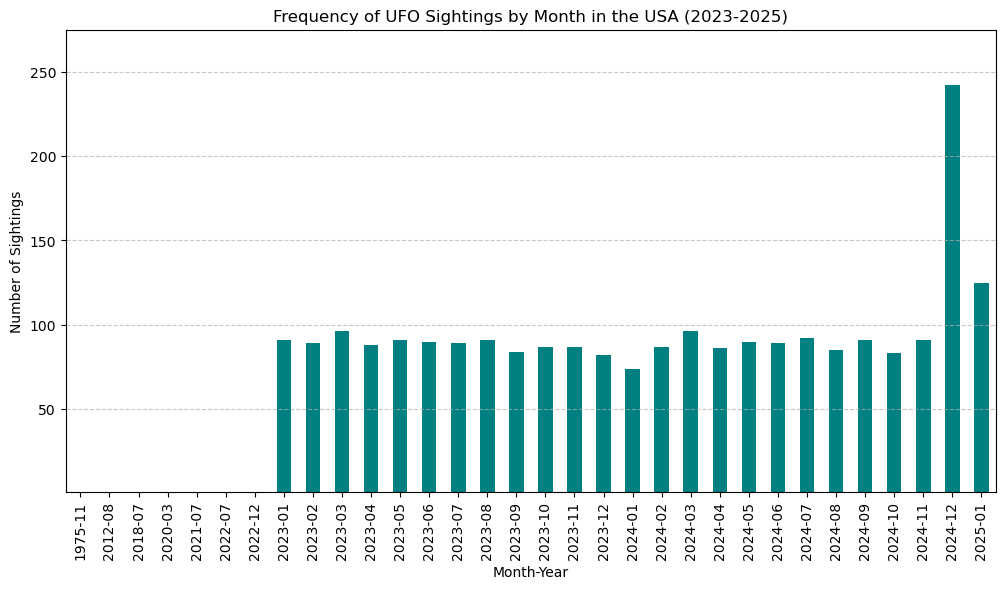

In [17]:
df_usa_only["Occurred"] = pd.to_datetime(df_usa_only["Occurred"], errors="coerce")

#get year and month 
df_usa_only["Year-Month"] = df_usa_only["Occurred"].dt.to_period("M")

#count sightings per month 
sightings_per_month = df_usa_only["Year-Month"].value_counts().sort_index()


#histoigram of sightings by month 
plt.figure(figsize=(12, 6))
sightings_per_month.plot(kind="bar", color="teal")

plt.title("Frequency of UFO Sightings by Month in the USA (2023-2025)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Sightings")
plt.ylim(1, 275)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#plot 
plt.show()

Month with the most frequent reports was March

Why?

Textual Analysis

In [18]:
reports = [report for report in ufo_data['Summary']]

In [19]:
def preprocess_text(text):
    if pd.isna(text):  #handle NaN values
        return ""
    doc = nlp(text.lower())
    text = re.sub(r'[^a-z\s]', '', text)
    words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]  #lemma and stop word removal
    return ' '.join(words)

processed_reports = [preprocess_text(report) for report in reports]

In [20]:
print(processed_reports)

['strange shape shift orb hover fly away', 'witness odd light near tv antenna pursue light evade stop turn back come', 'move fast straight', 'small white blue orb move sporadically sky', 'city strange hover shapeshifting object hover place', 'decide report become every night', 'star orb bright light move sideways shoot sky large speed', 'two light move slowly fade several mile west', 'bright object stationary reddish hue shifting color pattern second object pass fade', 'reddish light first think planet due color recollection jupiter sky', 'triangular craft spot ohio', 'several ufo come fly randomly anywhere visible disappear', 'large orange orb sky glow stationary', 'last couple week night warm light shine field across road house light move unconventionally', 'come home gym something tear drop right sky couple second rapidly go straight', 'circle white light move diagonally downward sky second completely disappear', 'white light turn red disappear', 'observe fast move light stop abrupt

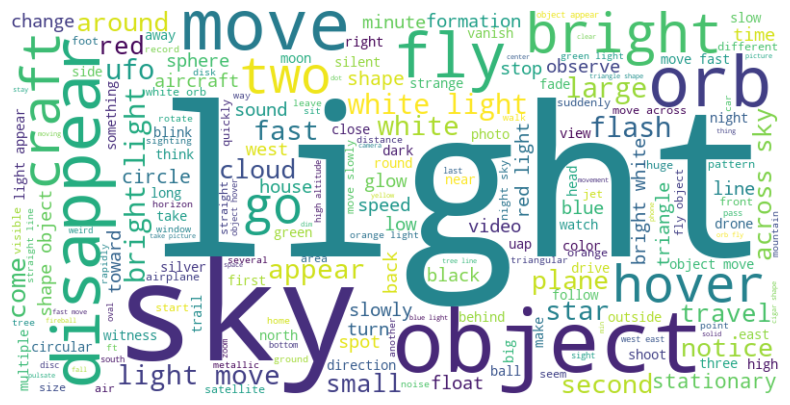

In [21]:
text_corpus = ' '.join(processed_reports)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

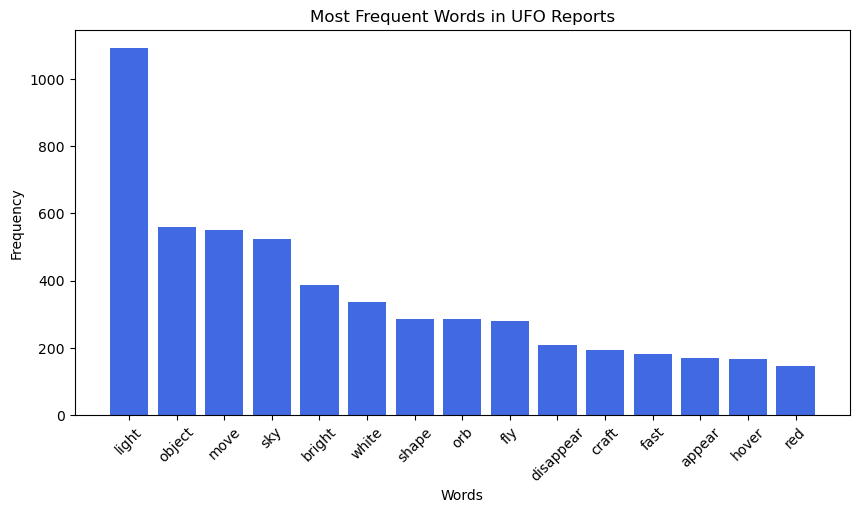

In [22]:

word_counts = Counter(" ".join(processed_reports).split())

#15 most common words
most_common_words = word_counts.most_common(15)
words, counts = zip(*most_common_words)  #unzip 

#plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='royalblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Frequent Words in UFO Reports")
plt.xticks(rotation=45)
plt.show()

Distribution of Report Types


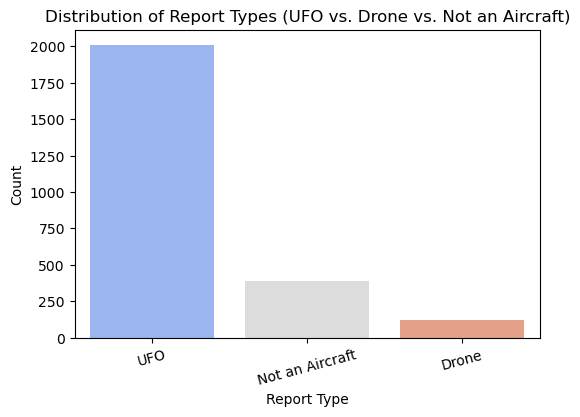

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x=ufo_data["report_type"], palette="coolwarm")
plt.title("Distribution of Report Types (UFO vs. Drone vs. Not an Aircraft)")
plt.xlabel("Report Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

Use BERT Tokenization and Sentiment Analysis for more accurate SA analysis

In [24]:


sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:

cleaned_reports = [str(report) if isinstance(report, str) else "" for report in ufo_data["Summary"]]

sentiment_stars = []  
sentiment_confidence_scores = [] 


for report in cleaned_reports:
    if len(report.strip()) == 0:  
        sentiment_stars.append(3)  
        sentiment_confidence_scores.append(0.5)  
        print("Skipping empty report")
        continue

    try:
        result = sentiment_analyzer(report)  
        stars = int(result[0]['label'].split()[0])  
        confidence_score = result[0]['score']  

        sentiment_stars.append(stars)
        sentiment_confidence_scores.append(confidence_score)

    except Exception as e:
        print(f"⚠️ Error processing report: {report} | Error: {str(e)}")
        sentiment_stars.append(3)  
        sentiment_confidence_scores.append(0.5) 

ufo_data["Sentiment_Stars"] = sentiment_stars
ufo_data["Sentiment_Confidence"] = sentiment_confidence_scores


print("\n🚀 Sentiment Scores Successfully Added:")
print(ufo_data[["Summary", "Sentiment_Stars", "Sentiment_Confidence"]].head(10))


Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report
Skipping empty report


Distribution of Sentiment Scores

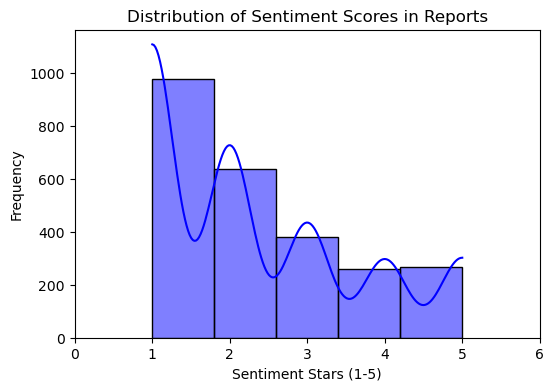

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(ufo_data["Sentiment_Stars"], bins=5
             , kde=True, color="blue",)

plt.title("Distribution of Sentiment Scores in Reports")
plt.xlabel("Sentiment Stars (1-5)")
plt.ylabel("Frequency")
plt.xlim(0,6)
plt.show()

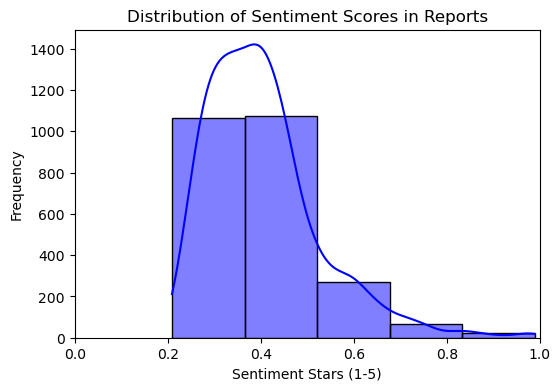

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(ufo_data["Sentiment_Confidence"]
             , bins=5
             , kde=True, color="blue",)

plt.title("Distribution of Sentiment Scores in Reports")
plt.xlabel("Sentiment Stars (1-5)")
plt.ylabel("Frequency")
plt.xlim(0,1)
plt.show()

TF-IDF Vectorization

In [ ]:





ufo_data = ufo_data.dropna(subset=["Summary"]).reset_index(drop=True)


tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(ufo_data["Summary"])


if "Occurred" in ufo_data.columns:
    def classify_time(time_str):
        try:
            hour = int(time_str.split()[1].split(":")[0])
            return "Night" if hour < 6 or hour > 18 else "Day"
        except:
            return "Unknown"

    ufo_data["Time_of_Day"] = ufo_data["Occurred"].apply(classify_time)
else:
    print("⚠️ Warning: `Occurred` column not found, setting `Time_of_Day` to 'Unknown'.")
    ufo_data["Time_of_Day"] = "Unknown"


if "Sentiment_Stars" in ufo_data.columns:
    ufo_data["Sentiment_Stars"] = pd.to_numeric(ufo_data["Sentiment_Stars"], errors="coerce").fillna(3)
else:
    ufo_data["Sentiment_Stars"] = 3  

if "Sentiment_Confidence" in ufo_data.columns:
    ufo_data["Sentiment_Confidence"] = pd.to_numeric(ufo_data["Sentiment_Confidence"], errors="coerce").fillna(0.5)
else:
    ufo_data["Sentiment_Confidence"] = 0.5  

encoder = LabelEncoder()
for col in ["City", "State", "Time_of_Day"]:
    ufo_data[col] = ufo_data[col].fillna("Unknown")
    ufo_data[col + "_encoded"] = encoder.fit_transform(ufo_data[col])


X_combined = np.hstack((  
    X_tfidf.toarray(),  
    ufo_data[["City_encoded", "State_encoded", "Time_of_Day_encoded", "Sentiment_Stars", "Sentiment_Confidence"]].values  
))
y_combined = ufo_data["report_type"]


X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)


model = LogisticRegression(max_iter=1000, solver="lbfgs")  


y_pred = model.predict(X_test)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="weighted"),
    "Recall": recall_score(y_test, y_pred, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred, average="weighted")
}




print("\n Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")



joblib.dump(model, "ufo_vs_drone_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print(" Model training complete!")



🚀 Model Performance Metrics:
Accuracy: 0.7940
Precision: 0.7132
Recall: 0.7940
F1-Score: 0.7195
🚀 Model training complete!


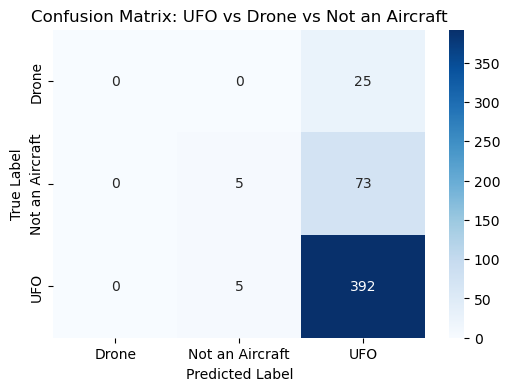

In [ ]:
import nbconvert
import subprocess

# Convert the notebook to HTML
notebook_path = "ufo_data_analysis_project_allphases.ipynb"  
html_output_path = "ufo_analysis_report.html"

# Convert using nbconvert
subprocess.run(["jupyter", "nbconvert", "--to", "html", notebook_path, "--output", html_output_path])

print(f"Exported notebook to {html_output_path}")


Exported notebook to ufo_analysis_report.html
